# Logistic Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   4]
 [  5  59]]


0.9473684210526315

In [24]:
y_score = classifier.predict_proba(X_test)
z = (y_score[:,1:2]).reshape(len(y_score[:,1:2]))
len(z)

171

In [29]:
y_test2 = y_test/2-1

In [30]:
from sklearn.metrics import roc_curve,plot_roc_curve
roc_curve(y_test2,z)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00934579, 0.00934579, 0.01869159, 0.01869159, 0.02803738,
        0.02803738, 0.03738318, 0.03738318, 0.04672897, 0.04672897,
        0.14018692, 0.1588785 , 0.20560748, 0.22429907, 0.30841121,
        0.3271028 , 0.3364486 , 0.35514019, 0.37383178, 0.39252336,
        0.40186916, 0.43925234, 0.5046729 , 0.53271028, 0.60747664,
        0.61682243, 0.64485981, 0.68224299, 0.71962617, 0.72897196,
        0.78504673, 0.80373832, 0.8317757 , 0.85981308, 0.86915888,
        0.93457944, 0.94392523, 0.99065421, 1.        ]),
 array([0.      , 0.015625, 0.265625, 0.296875, 0.78125 , 0.78125 ,
        0.8125  , 0.8125  , 0.84375 , 0.84375 , 0.921875, 0.921875,
        0.953125, 0.953125, 1.      , 1.      , 1.      , 1.      ,
        1.      , 1.      , 1.      , 1.      , 1.      , 1.      ,
        1.      , 1.      , 1.      , 1.      , 1.      , 1.      ,
        1.      , 1.      , 1.      , 1.      , 1.      , 

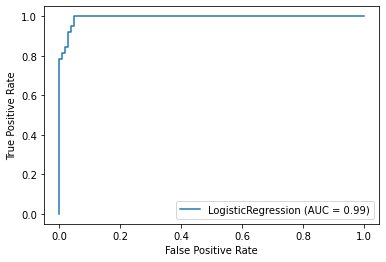

In [31]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier,X_test,y_test)